<a href="https://colab.research.google.com/github/IvanKatorgin/Feature-Engineering/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Работа с признаками и построение моделей". Домашнее задание 1. Классификация: Логистическая регрессия и SVM. Каторгин И.П.

Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

Этапы работы:
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
- Проведите первичный анализ.
- Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- Преобразуйте категориальные признаки.
- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [97]:
import pandas as pd, numpy as np, math, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [98]:
adult = pd.read_csv('adult.csv', encoding = "utf-8", sep = ',')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Проведите первичный анализ

In [99]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [100]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

In [101]:
adult.isna().mean() * 100

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


In [ ]:
# Пропуски в данных не обнаружены. Проверим на выбросы

In [102]:
adult[['age']].value_counts()

,count
age,
36,1348
35,1337
33,1335
23,1329
31,1325
...,...
88,6
85,5
87,3


In [103]:
adult[['workclass']].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [104]:
adult[['fnlwgt']].value_counts()

,count
fnlwgt,
203488,21
190290,19
120277,19
125892,18
126569,18
...,...
163494,1
163480,1
163460,1


In [105]:
adult[['education']].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [106]:
adult[['educational-num']].value_counts()

,count
educational-num,
9,15784
10,10878
13,8025
14,2657
11,2061
7,1812
12,1601
6,1389
4,955


In [107]:
adult[['marital-status']].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [108]:
adult[['occupation']].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [109]:
adult[['relationship']].value_counts()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [110]:
adult[['race']].value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [111]:
adult[['gender']].value_counts()

,count
gender,
Male,32650
Female,16192


In [112]:
adult[['capital-gain']].value_counts()

,count
capital-gain,
0,44807
15024,513
7688,410
7298,364
99999,244
...,...
2387,1
22040,1
1111,1


In [113]:
adult[['capital-loss']].value_counts()

,count
capital-loss,
0,46560
1902,304
1977,253
1887,233
2415,72
...,...
155,1
1870,1
2080,1


In [114]:
adult[['hours-per-week']].value_counts()

,count
hours-per-week,
40,22803
50,4246
45,2717
60,2177
35,1937
...,...
87,1
82,1
94,1


In [115]:
adult[['native-country']].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [116]:
adult[['income']].value_counts()

,count
income,
<=50K,37155
>50K,11687


Есть значения, отмеченные как "?" в столбцах occupation, workclass и native-country. Предлагается эти значения удалить, т.к. невозможно заполнить их какими-то другими значениями

In [117]:
df = adult.loc[adult['workclass'] != '?']
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [118]:
df = df.loc[df['occupation'] != '?']
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [119]:
df = df.loc[df['native-country'] != '?']
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Посмотрим на распределение по возрасту

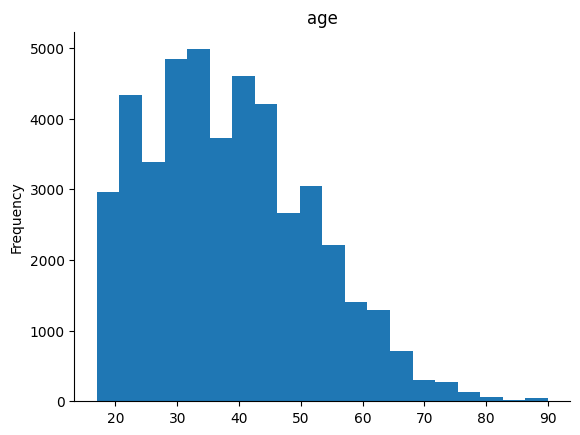

In [120]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Распределение рабочих часов в неделю

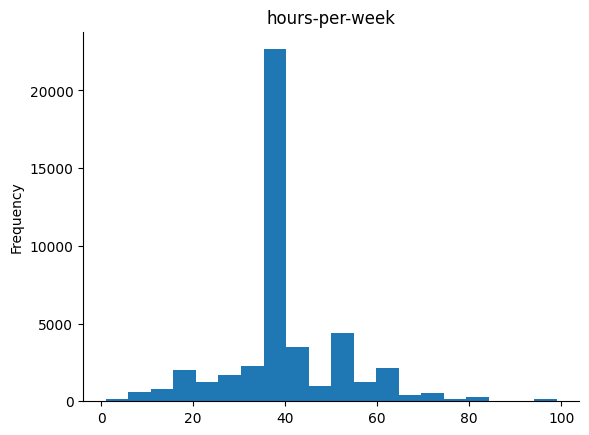

In [121]:
# @title hours-per-week
df['hours-per-week'].plot(kind='hist', bins=20, title='hours-per-week')
plt.gca().spines[['top', 'right',]].set_visible(False)

Распределение по workclass

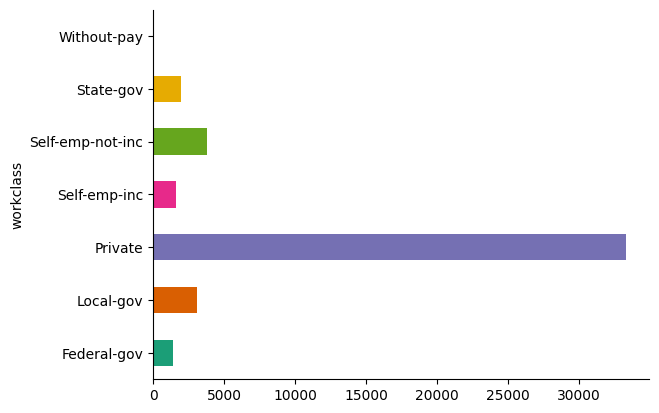

In [122]:
# @title workclass

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('workclass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Распределение по расе

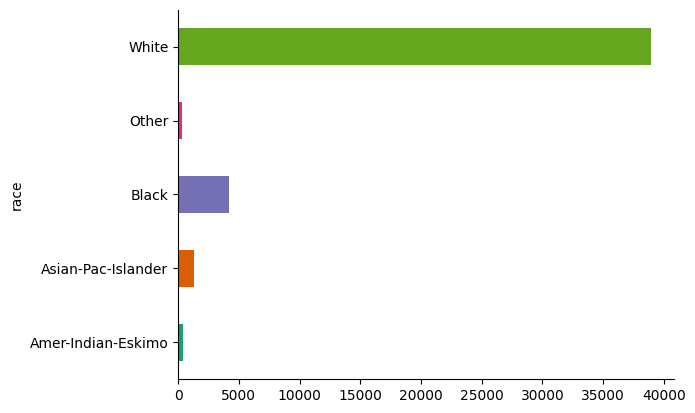

In [123]:
# @title race

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Выводы:
1. Средний возраст примерно 30-35 лет
2. Люди работают чаще всего 40 часов в неделю
3. В основном "белая" раса

Преобразуйте категориальные признаки

In [ ]:
0   age              48842 non-null  int64
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object

In [124]:
# попробуем выбрать какие-нибудь признаки, для начала
selectedColumns = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']]
selectedColumns

,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# столбцы workclass, education, marital-status, occupation, relationship, race, gender, native-country - категориальные переменные
# переведем их в значения 0 и 1, добавив столбцы с соответствующими названиями
# столбец income является целевой переменной, удаляем его

In [125]:
X = pd.get_dummies(selectedColumns, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])
X

,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,40,<=50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,0,50,<=50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,0,40,>50K,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,7688,0,40,>50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0,0,30,<=50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,38,<=50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,0,0,40,>50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,0,0,40,<=50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,0,0,20,<=50K,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [126]:
# столбец income является целевой переменной, удаляем его
del X['income']
X

,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,0,50,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,0,40,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,7688,0,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0,0,30,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,38,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,0,0,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,0,0,40,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,0,0,20,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [127]:
# LabelEncoder ставит в соответствие значению income 0 и 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [128]:
le.fit(df['income'])

LabelEncoder()

In [129]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [130]:
le.transform(['<=50K', '>50K', '<=50K']) # пример расшифровки

array([0, 1, 0])

In [131]:
le.inverse_transform([1, 0, 1])

array(['>50K', '<=50K', '>50K'], dtype=object)

In [132]:
# записываем в таргетную переменную y преобразованный столбец sex

y = pd.Series(data=le.transform(df['income']))
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [133]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression классификация
# LinearRegression регрессия

In [134]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Index([21762, 21701, 42663, 42694, 13590, 47537, 42284,  2021, 48236, 46692,
       ...
       15594, 37624, 15046, 42351,  6849, 39182,  3157,  2411, 32125, 10882],
      dtype='int64', length=9045)

Обучите модели логистической регрессии и опорных векторов на обучающем множестве

Модель логистической регрессии

In [136]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [137]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0])

In [138]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
model.predict_proba(X_test)

array([[0.99585044, 0.00414956],
       [0.93661795, 0.06338205],
       [0.66852966, 0.33147034],
       ...,
       [0.75644307, 0.24355693],
       [0.87176536, 0.12823464],
       [0.98811407, 0.01188593]])

Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score

In [140]:
model.score(X_train, y_train)

0.845703071011969

In [141]:
model.score(X_test, y_test)

0.8485351022664456

Модель опорных векторов

In [142]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

Снова получаем наш скор, для обучающей и тестовой выборок

In [143]:
clf.score(X_train, y_train)

0.8485225419465406

In [144]:
clf.score(X_test, y_test)

0.834383637368712

Без StandardScaler:

In [145]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [146]:
svc.score(X_train, y_train)

0.7733090084860547

In [147]:
svc.score(X_test, y_test)

0.7773355444997236

Сформулируйте выводы по проделанной работе

Кратко опишите какие преобразования были сделаны с данными

Сравните точность двух моделей

Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

Основные выводы:
1. Был проанализирован исходный датасет, проведен разведочный анализ данных
2. Датасет был подготовлен для построения моделей
3. Категориальные признаки workclass, education, marital-status, occupation, relationship, race, gender, native-country были переведены в бинарные
4. Были построены модели логистической регрессии и опорных векторов на обучающем множестве (модели опорных векторов были построены как со StandardScale, так и без) для классификации физических лиц по уровню дохода
5. В целом обе модели показали высокую точность более 80%, при этом стоит отметить, что модель логистической регрессии боказала более высокую точность на тестовых данных, тогда как модель опорных векторов на тренировочных. Так же следует отметить, что модель опорных векторов без StandardScale показала худший результат (точность менее 80%).

В целом можно считать, что поставленную задачу выполнили, но при этом для повышения точности моделей можно измпнять количество признаков (в данном случае удалять) и смотреть как будет меняться точность моделей